In [1]:
# Credit Risk Scorecard Project
# Notebook 01: Data Understanding
#
# Objective:
# Understand the structure, quality, and limitations of the credit dataset
# before any modeling decisions are made.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("credit_default.csv")


In [5]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.shape


(30000, 25)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

2.Identifying target variable

In [14]:
df['default.payment.next.month'].value_counts(normalize=True)


0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [ ]:
#Approximately 22.12% of customers defaulted indicating class imbalance typical in credit risk data.

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [45]:
df = df.rename(columns={
    'default_payment_next_month': 'default',
    'PAY_0': 'repayment_status_sept',
    'PAY_2': 'repayment_status_aug',
    'PAY_3': 'repayment_status_jul',
    'LIMIT_BAL': 'credit_limit'
})


In [33]:
df = df.rename(columns={'default_payment_next_month': 'default'})

In [ ]:
# Column names were standardized for clarity and auditability,
# which is required in regulated environments.


3.Understanding customer dmographics


In [ ]:
df[['AGE', 'SEX', 'EDUCATION', 'MARRIAGE']].describe()


,AGE,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,1.603733,1.853133,1.551867
std,9.217904,0.489129,0.790349,0.521970
min,21.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,1.000000
50%,34.000000,2.000000,2.000000,2.000000
75%,41.000000,2.000000,2.000000,2.000000
max,79.000000,2.000000,6.000000,3.000000


In [41]:
df[['AGE', 'SEX' , 'EDUCATION' , 'MARRIAGE']].describe()

,AGE,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,1.603733,1.853133,1.551867
std,9.217904,0.489129,0.790349,0.521970
min,21.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,1.000000
50%,34.000000,2.000000,2.000000,2.000000
75%,41.000000,2.000000,2.000000,2.000000
max,79.000000,2.000000,6.000000,3.000000


<function matplotlib.pyplot.show(close=None, block=None)>

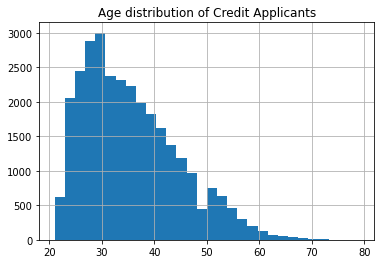

In [42]:
df['AGE'].hist(bins=30
)
plt.title("Age distribution of Credit Applicants")
plt.show

In [ ]:
#Age distribution appears to be reasonable for a retail credit portfolio.
#Outliers will be reviewed in data cleaning stage.

4.Financial exposure and behaviour


In [ ]:
#Credit Limit
df['credit_limit'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: credit_limit, dtype: float64

In [49]:
#Repayment behaviour
repayment_cols = ['repayment_status_sept', 'repayment_status_aug','repayment_status_jul']
df[repayment_cols].describe()

,repayment_status_sept,repayment_status_aug,repayment_status_jul
count,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200
std,1.123802,1.197186,1.196868
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000


In [ ]:
#Repayment status variables capture historical deliquency patterns shown among strongest predictors

5.Checking for missing values


In [50]:
df.isnull().sum()

ID                            0
credit_limit                  0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
repayment_status_sept         0
repayment_status_aug          0
repayment_status_jul          0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
#no explicit values are notes except encoded values i.e -1,0 which will be reviewed for business meaning.

6.Potential Data Leakage


In [53]:
df.corr()['default.payment.next.month'].sort_values(ascending=False)

default.payment.next.month    1.000000
repayment_status_sept         0.324794
repayment_status_aug          0.263551
repayment_status_jul          0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
credit_limit                 -0.153520
Name: default.payment.nex

Variables showing unusual high correlation with target will be reviewed to avoid data leakage especially those capturing post event information

7.Decision on what not to use!
Not all variables will be used for modelling.Features unavailable at time of credit decision or that raise regulatory concerns will be excluded at later stages.
